In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# All features

correct/TP: 156 ** FP: 0 **  TN: 1411 ** FN: 6 ** cv_bin mean: 0.972950 ** cv_bin std: 0.018030 ** cv_mac mean: 0.985262 ** cv_mac std: 0.009808 ** f1bin: 0.981132 ** f1mac: 0.989505
correct/TP: 305 ** FP: 0 **  TN: 3449 ** FN: 20 ** cv_bin mean: 0.967228 ** cv_bin std: 0.025017 ** cv_mac mean: 0.981974 ** cv_mac std: 0.013727 ** f1bin: 0.968254 ** f1mac: 0.982681


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


correct/TP: 416 ** FP: 0 **  TN: 4572 ** FN: 44 ** cv_bin mean: 0.936784 ** cv_bin std: 0.061469 ** cv_mac mean: 0.965811 ** cv_mac std: 0.033237 ** f1bin: 0.949772 ** f1mac: 0.972491


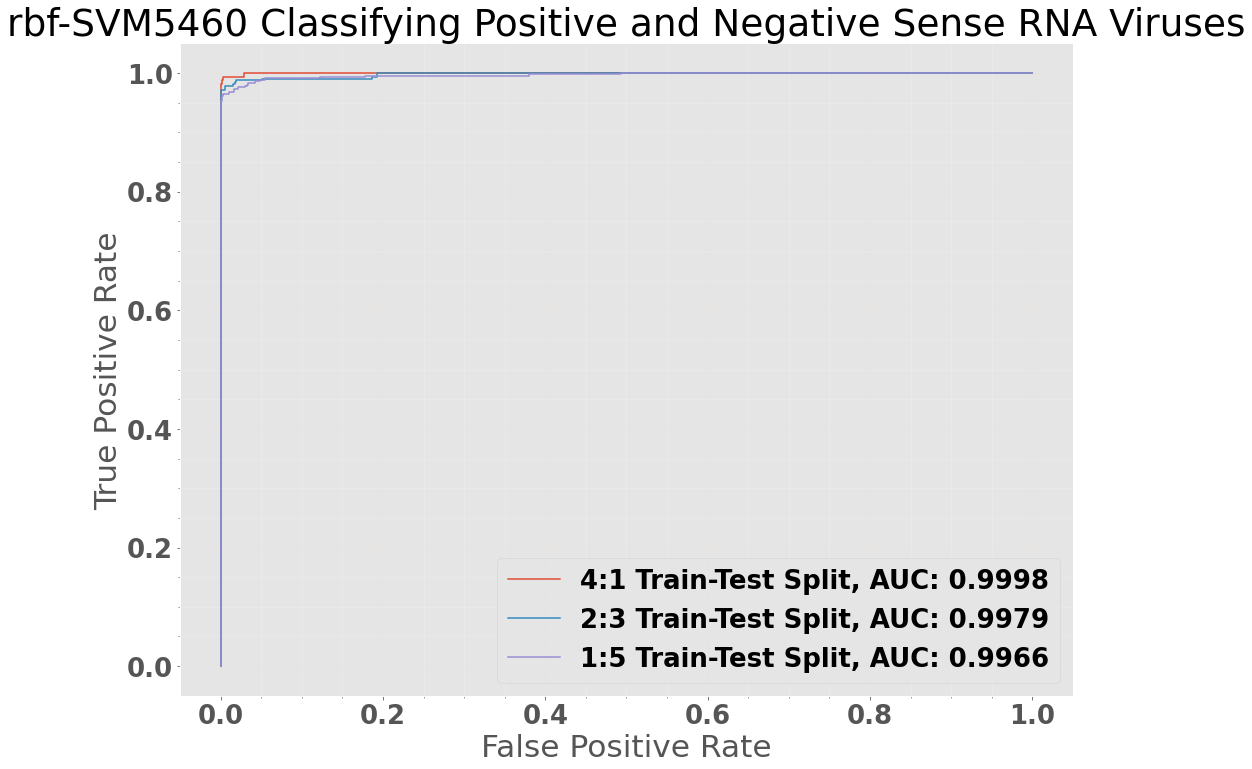

In [ ]:
df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam']],
                 pd.read_csv('drive/My Drive/ppnnw5.csv').iloc[:,10:],
                 pd.read_csv('drive/My Drive/ppnnw6.csv').iloc[:,10:]], axis = 1)
df1.loc[df1['Gen'] == 'ssRNA(+)', 'Gen'] = 0
df1.loc[df1['Gen'] == 'ssRNA(+)i', 'Gen'] = 0
df1.loc[df1['Gen'] == 'ssRNA(-)', 'Gen'] = 1
df1.loc[df1['Gen'] == 'ssRNA(-)g', 'Gen'] = 1
data = df1

#Splitting features and labels
X = data.iloc[:, 3:].values.astype(float)
y = data.iloc[:, 0].values.astype(float)
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin1 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac1 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin1 = f1_score(y_test, y_pred, average='binary')
f1mac1 = f1_score(y_test, y_pred, average='macro')

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm1[1,1], cm1[0,1], cm1[0,0], cm1[1,0], cv_bin1.mean(), cv_bin1.std(), cv_mac1.mean(), cv_mac1.std(), f1bin1, f1mac1))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.rc('font', **{'family' : 'sans-serif', 'weight' : 'bold', 'size' : 26})
plt.rcParams['font.sans-serif'] = ['Lucida Grande']
acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin2 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac2 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin2 = f1_score(y_test, y_pred, average='binary')
f1mac2 = f1_score(y_test, y_pred, average='macro')

acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm2[1,1], cm2[0,1], cm2[0,0], cm2[1,0], cv_bin2.mean(), cv_bin2.std(), cv_mac2.mean(), cv_mac2.std(), f1bin2, f1mac2))


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin3 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac3 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin3 = f1_score(y_test, y_pred, average='binary')
f1mac3 = f1_score(y_test, y_pred, average='macro')

acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm3[1,1], cm3[0,1], cm3[0,0], cm3[1,0], cv_bin3.mean(), cv_bin3.std(), cv_mac3.mean(), cv_mac3.std(), f1bin3, f1mac3))


plt.title("rbf-SVM5460 Classifying Positive and Negative Sense RNA Viruses")
plt.legend(['4:1 Train-Test Split, AUC: %.4f' % auc1, 
            '2:3 Train-Test Split, AUC: %.4f' %auc2,
            '1:5 Train-Test Split, AUC: %.4f' %auc3])
#major grid lines
plt.grid(b=True, which='major', color='moccasin', alpha=0.1, linestyle='dashdot', lw=1.5)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='azure', alpha=0.2, ls='-', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('PNClass1.png', xlabel = "False Positive Rate", ylabel = "True Positive Rate")
plt.show()

# 194 Features

correct/TP: 126 ** FP: 0 **  TN: 1438 ** FN: 9 ** cv_bin mean: 0.974689 ** cv_bin std: 0.017888 ** cv_mac mean: 0.986125 ** cv_mac std: 0.009781 ** f1bin: 0.965517 ** f1mac: 0.981199
correct/TP: 331 ** FP: 0 **  TN: 3416 ** FN: 27 ** cv_bin mean: 0.964862 ** cv_bin std: 0.020421 ** cv_mac mean: 0.980921 ** cv_mac std: 0.011070 ** f1bin: 0.960813 ** f1mac: 0.978438
correct/TP: 416 ** FP: 0 **  TN: 4575 ** FN: 41 ** cv_bin mean: 0.938730 ** cv_bin std: 0.063963 ** cv_mac mean: 0.966779 ** cv_mac std: 0.034472 ** f1bin: 0.953036 ** f1mac: 0.974287


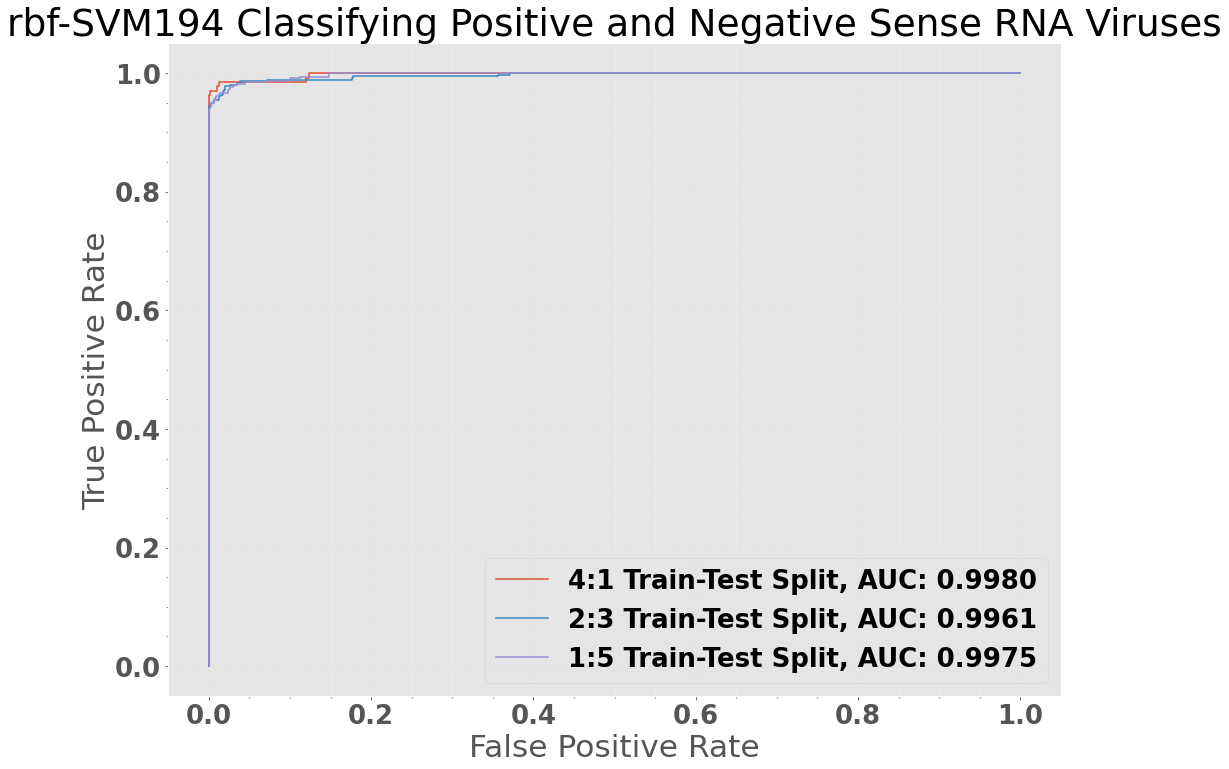

In [ ]:
l =    ['CAATCG', 'GGTA', 'GTTGA', 'CATACG', 'TGAT', 'GTCGAA', 'CCAATT', 'TGTCGA', 'GTTGAC', 
        'CGGTTA', 'CGATA', 'TAGCGT', 'AAAAAA', 'GGTTGA', 'AAAAA', 'CAAT', 'CGTCAA', 'CGGTAA', 
        'CGTTGA', 'CAAC', 'ACCAAT', 'TTGACG', 'TCAATC', 'GTTG', 'CAATTG', 'CGCAAT', 'GGTT', 
        'TTGTCG', 'TCAA', 'CCAAT', 'ATACGC', 'CGATAG', 'TTGA', 'CATCAA', 'GTTGAT', 'ATACGG', 
        'CGATC', 'GTTGGT', 'GATC', 'CCGATA', 'GTCAAT', 'CGATAA', 'CGCGTT', 'ATCGTA', 'TCGGTT', 
        'ATCAAC', 'ATTGG', 'TCGA', 'GCAATC', 'CAATCT', 'GCGTAC', 'TTCGAC', 'GGTTG', 'TCCAAT', 
        'CGTAGT', 'TTGCG', 'CGGTT', 'CGATTA', 'ACGGTT', 'ATCAAT', 'TTGCGC', 'CAATC', 'CGAT', 
        'GCGTTA', 'CCGTTA', 'TTGAC', 'CGTCGA', 'ATAGCG', 'GTTGAG', 'TATCCG', 'GGTAGT', 'CGTTGC', 
        'TCGGTA', 'TGGTT', 'AGGTTG', 'AGGAA', 'TCGAGT', 'TCAAT', 'ATAGGG', 'GTACGC', 'ACGCAA', 
        'GGTACG', 'TCCTG', 'CAGAG', 'TTGATG', 'GTCGAC', 'CGGTTG', 'ACATCG', 'CAGC', 'TTTTTT', 
        'GGTATG', 'TAGGGT', 'GGTTC', 'TGGTTC', 'CGCGTA', 'AACC', 'CTCGAT', 'AACGGT', 'ATCAA', 
        'TCCAAC', 'AAAATG', 'AAATG', 'GTTGT', 'GTCATA', 'TCAATT', 'ACAATC', 'AATAAA', 'AATTGG', 
        'ATCATA', 'GGCGTA', 'AAATAA', 'TCAAC', 'CTAACG', 'ACGATA', 'TCAACC', 'ACCGGT', 'CAGA', 
        'GCATAC', 'CTGTA', 'CGGTA', 'GTTGC', 'CTGT', 'ATTGGT', 'GGTCAA', 'CGTA', 'GTCAA', 'TCGCAA', 
        'AGCTG', 'ATGGTA', 'CGCAA', 'GTCAAA', 'GATTGG', 'CTGGA', 'TTCGCA', 'ATCCAA', 'AACCGA', 
        'CCGCAA', 'GTCGA', 'TAACAC', 'TTTTTA', 'ATAACG', 'TATGGT', 'TTGGCG', 'TGGT', 'TCCAT', 
        'CAATT', 'GCGTAA', 'TCGT', 'CCGTAA', 'GGGTTA', 'CAATTA', 'AGCCT', 'TAGCGA', 'TACCAC', 
        'CGCAAA', 'ATATCG', 'CTGCA', 'CGTACC', 'ATCGGT', 'TCGATA', 'TCGTTG', 'TTGGT', 'CGACCA', 
        'GAAGA', 'GT', 'CTGAG', 'ATGCGA', 'CAG', 'GGTAC', 'GGTTGT', 'CCATAC', 'GTTGCG', 'GATAGG', 
        'GAT', 'CAA', 'CATACC', 'AACCGT', 'TTGCGA', 'CGTAT', 'CGTAAT', 'CGATGT', 'TTCCT', 'AC', 
        'CGATCG', 'CGCTAA', 'CACAAC', 'TACC', 'TTGAG', 'CCAATC', 'TATGCG', 'TATCG', 'AGCAG', 'GGTAG', 
        'TCGTAG', 'AACCCG', 'AGAG', 'GAATCA', 'GAAGTT', 'GAAGAT', 'TCTTTA', 'CGAAGA', 'TCGAT', 'CAGT', 
        'CTTGA', 'TACG', 'CGTATG', 'CAAACA', 'TTCG', 'AGGGTT', 'TCGACC', 'CGTT', 'CTGTGA', 'TCAGT', 
        'CAGCT', 'GTGTCT', 'TGTAAA', 'ATGCCT', 'TAAACC', 'ATACCG', 'AACCG', 'CAACAA', 'CATTGG', 
        'GTACTC', 'TGTGAA', 'ATACCC', 'AACACC', 'TGCAGT', 'ATGTAA', 'AGGA', 'AAGCAC', 'GTAGGT', 
        'GTAGCT', 'CGTAGA', 'ACCCAA', 'CCAATA', 'TATTTT', 'CTTG', 'TTTTT', 'GCAATG', 'GTCGTC', 
        'GTCTAA', 'ATGCTG', 'CGTATC', 'TAGTTA', 'CAATCC', 'TTGGTC', 'TCGCA', 'GTCCAA', 'TAGGTC', 
        'CGAC', 'TGATC', 'CATAAC', 'TGATTA', 'CAATAG', 'TCTCGA', 'CTACAG', 'CTTTGG', 'TACGTC', 
        'CTCAGT', 'TTGG', 'TATTTG', 'AAACTG', 'TTCGCC', 'TGACAC', 'ACTCGT', 'CACAAA', 'TGACGA', 
        'CTTGAT', 'TCGACT', 'TGATCG', 'TAACG', 'ATATTT', 'TAGAGG', 'CCGATC', 'TCAACG', 'GTCGAT', 
        'GCGATA', 'ATGCCG', 'ACAAC', 'ACACCG', 'TTACCG', 'CGTAC', 'GTATTT', 'TTGCGT', 'CTCAG', 
        'CTTGCG', 'TTTCGA', 'TCGTA', 'TCCTGA', 'TACGCC', 'GAAG', 'GCTATC', 'CTAGTG', 'CCCTAT', 
        'ACCAGA', 'GTACTG', 'CATTTA', 'GTTAGA', 'ATAATC', 'AGGCAT', 'GATGTT', 'TAGATT', 'CAACGC', 
        'CGATTG', 'ACATTT', 'AAATGT', 'CCGAT', 'GTTATA', 'TGTTG', 'TTCAAT', 'GTCGTT', 'ACCGAT', 
        'CGATAC', 'TCGATG', 'CCACAC', 'CCAT', 'GGGTGT', 'CTATC', 'GTTGTG', 'CTTTCG', 'ATAGAT', 
        'TATGGC', 'AGCTGG', 'CTCT', 'CACAGA', 'TGGTTG', 'CTAG', 'ACGGGT', 'CATTTT', 'TTTTAG', 
        'CATAAT', 'AACCCA', 'CATAG', 'ACGGGA', 'GGTGTT', 'CCGTCC', 'AAGACC', 'ATTGCG', 'CAGTTT', 
        'TGAAGA', 'ATCG', 'AATTTG', 'TCAAAA', 'CCAAC', 'ATCA', 'TGCAG', 'CAAATT', 'ACGTTA', 'CGACTA', 
        'ACCCCT', 'CCCACT', 'CCGTAT', 'CAACGG', 'TCCATC', 'ACTAGG', 'AAGCAG', 'TTTGTA', 'GGGTCA', 
        'CGGTGT', 'GCAGTT', 'ACAATT', 'ACAACC', 'ACGTTG', 'AAATAC', 'TTCAGT', 'AGTTGA', 'GACATA', 
        'CTGACT', 'CTGTTT', 'CAAGGG', 'ATTTTA', 'CAAAC', 'TAGG', 'CTGAA', 'GCGATC', 'CAACCA', 
        'ATTCGC', 'CAATTC', 'CGTTAG', 'CACTAG', 'AGCAGT', 'CTTCTT', 'CAACTG', 'GGTGAG', 'TTCAG', 
        'AAATA', 'CGTTGT', 'TATCGC', 'AGCCA', 'GGTGAT', 'GGATAA', 'GCTGTA', 'GAAGTA', 'TTGAT', 
        'ACCGAC', 'TAGTCG', 'CTGTG', 'ATCTA', 'ACACCA', 'ATGGAT', 'CCTC', 'TGAAG', 'CGCACT', 'TAACCC', 
        'ACGTCA', 'TGATAG', 'TCGAA', 'ATACCA', 'AGGGTA', 'GATCGT', 'ATCCAG', 'TCAGC', 'GCAGAT', 
        'TACCTG', 'ACCCGT', 'CCATA', 'AATTGA', 'AGGTAC', 'GGT', 'CTGCCT', 'ACTAGT', 'TTGTTC', 'TTACTT', 
        'TTTTA', 'CAGAC', 'GCGTAG', 'GAGCAT', 'ATC', 'ATGG', 'AAGCCT', 'CACTCG', 'TCAGTG', 'CTGGAG', 
        'CTTCCT', 'CGTCAT', 'CCGTTG', 'TAGTTG', 'CGTCCA', 'GCCCAG', 'ATGGT', 'TACAC', 'GATAGT', 
        'ACAACA', 'CTATAG', 'AATGGT', 'AGAAA', 'ATGACG', 'GATAAC', 'CAGCTT', 'CATGAT', 'TTCGTT', 
        'GTGTAC', 'TTGAAC', 'CACAAG', 'AATTG', 'GTCA', 'TGCCT', 'CTCGAC', 'CTATCT', 'TGACGG', 
        'CCATAT', 'ACCATT', 'AAAGAG', 'ATTAGA', 'GCGTAT', 'CGTTG', 'TACGT', 'ACGAT', 'TCCATG', 
        'CCTG', 'GTCAAC', 'TTGTGA', 'ACTAG', 'GCGACA', 'TGAAGC', 'TACAAC', 'ACGGTA', 'TAGCGG', 
        'ATTGAT', 'ATCACG', 'ATTCGG', 'TATTTC', 'TAAAAT', 'GTATCG', 'CAACCG', 'CCCCAA', 'CGTAAC',
        'CTAGGG', 'ATCAAA', 'ATTGGA', 'TCGTC', 'GCAACT', 'CACTA', 'CCATAG', 'CACAA', 'ATAGGT', 
        'ACGTAG', 'CATGCG', 'ATGATC', 'CCGTCA', 'CGATT', 'TTTGAC', 'CGTTA', 'TCTGTA', 'TAGATC', 
        'CATAGC', 'TCCAGA', 'ACACTC', 'CGATCA', 'GGATGT', 'TTACGC', 'AACTGC', 'ATCCAT', 'CCACTC', 
        'GTCCAT', 'ACCACT', 'GCGCGG', 'GTCAAG', 'AAGTGT', 'ATGATA', 'AGCT', 'CTAGAG', 'GCAGA', 
        'GTCATG', 'CTGTAG', 'TCATGC', 'CAGAA', 'ACACGG', 'CGGTAT', 'TTTTAA', 'TCAAAG', 'TTACAC', 
        'TCCGCT', 'CCCCCC', 'GCACAA', 'TTCTGT', 'TATGTA', 'GGTAAC', 'TAGCG', 'ATACC', 'GGTATC', 
        'ACAA', 'TCTGT', 'ACTA', 'TCCGTA', 'CTATCA', 'CGCATA', 'TCTCAG', 'CATGGA', 'ATCT', 'TGCGAC', 
        'ACAC', 'GACCAT', 'CAGCAT', 'ACG', 'CTAGTA', 'TTAGCG', 'TAACGA', 'ACTGAG', 'GAAGT', 'CTTGAC', 
        'CGTAGG', 'TCGCTC', 'CTGAAG', 'TTGACA', 'CGGCAA', 'CTCAAG', 'ACGTA', 'CAAGTG', 'TCAGA', 'GAGCAA', 
        'CGAAAG', 'ACTTTT', 'TACCG', 'GTTGTT', 'GCCATA', 'GCGTA', 'ACGA', 'TCGACG', 'ATACG', 'GTAC', 
        'TTGCCG', 'GGCGGG', 'CTAGT', 'GAACCA', 'TTTCTG', 'TCTTGA', 'TAAAA', 'TTGAGG', 'TAACGC', 'TATAGG',
        'GTCGTA', 'GCATTT', 'TACTG', 'TATCGA', 'CGTAA', 'AGGCTT', 'CGTTAT', 'TATC', 'TTGATT', 'TGCAGA', 
        'TAGGCG', 'GCTTGA', 'ATCTAT', 'GGTTAG', 'TACAAT']

c = [f for f in l if len(f) < 6]
b = [f for f in l if len(f) == 6]

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)
df1.loc[df1['Gen'] == 'ssRNA(+)', 'Gen'] = 0
df1.loc[df1['Gen'] == 'ssRNA(+)i', 'Gen'] = 0
df1.loc[df1['Gen'] == 'ssRNA(-)', 'Gen'] = 1
df1.loc[df1['Gen'] == 'ssRNA(-)g', 'Gen'] = 1
data = df1

#Splitting features and labels
X = data.iloc[:, 3:].values.astype(float)
y = data.iloc[:, 0].values.astype(float)
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin1 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac1 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin1 = f1_score(y_test, y_pred, average='binary')
f1mac1 = f1_score(y_test, y_pred, average='macro')

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm1[1,1], cm1[0,1], cm1[0,0], cm1[1,0], cv_bin1.mean(), cv_bin1.std(), cv_mac1.mean(), cv_mac1.std(), f1bin1, f1mac1))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.rc('font', **{'family' : 'sans-serif', 'weight' : 'bold', 'size' : 26})
plt.rcParams['font.sans-serif'] = ['Lucida Grande']
acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin2 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac2 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin2 = f1_score(y_test, y_pred, average='binary')
f1mac2 = f1_score(y_test, y_pred, average='macro')

acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm2[1,1], cm2[0,1], cm2[0,0], cm2[1,0], cv_bin2.mean(), cv_bin2.std(), cv_mac2.mean(), cv_mac2.std(), f1bin2, f1mac2))


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin3 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac3 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin3 = f1_score(y_test, y_pred, average='binary')
f1mac3 = f1_score(y_test, y_pred, average='macro')

acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm3[1,1], cm3[0,1], cm3[0,0], cm3[1,0], cv_bin3.mean(), cv_bin3.std(), cv_mac3.mean(), cv_mac3.std(), f1bin3, f1mac3))


plt.title("rbf-SVM194 Classifying Positive and Negative Sense RNA Viruses")
plt.legend(['4:1 Train-Test Split, AUC: %.4f' % auc1, 
            '2:3 Train-Test Split, AUC: %.4f' %auc2,
            '1:5 Train-Test Split, AUC: %.4f' %auc3])
#major grid lines
plt.grid(b=True, which='major', color='moccasin', alpha=0.1, linestyle='dashdot', lw=1.5)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='azure', alpha=0.2, ls='-', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('PNClass2.png', xlabel = "False Positive Rate", ylabel = "True Positive Rate")
plt.show()


# 68 Features

correct/TP: 119 ** FP: 0 **  TN: 1439 ** FN: 15 ** cv_bin mean: 0.933433 ** cv_bin std: 0.017185 ** cv_mac mean: 0.963522 ** cv_mac std: 0.009376 ** f1bin: 0.940711 ** f1mac: 0.967763
correct/TP: 119 ** FP: 0 **  TN: 1439 ** FN: 15 ** cv_bin mean: 0.933433 ** cv_bin std: 0.017185 ** cv_mac mean: 0.963522 ** cv_mac std: 0.009376 ** f1bin: 0.940711 ** f1mac: 0.967763
correct/TP: 281 ** FP: 7 **  TN: 3431 ** FN: 55 ** cv_bin mean: 0.919865 ** cv_bin std: 0.039748 ** cv_mac mean: 0.956243 ** cv_mac std: 0.021550 ** f1bin: 0.900641 ** f1mac: 0.945843
correct/TP: 281 ** FP: 7 **  TN: 3431 ** FN: 55 ** cv_bin mean: 0.919865 ** cv_bin std: 0.039748 ** cv_mac mean: 0.956243 ** cv_mac std: 0.021550 ** f1bin: 0.900641 ** f1mac: 0.945843
correct/TP: 384 ** FP: 10 **  TN: 4557 ** FN: 81 ** cv_bin mean: 0.852768 ** cv_bin std: 0.079750 ** cv_mac mean: 0.920823 ** cv_mac std: 0.042576 ** f1bin: 0.894063 ** f1mac: 0.942088
correct/TP: 384 ** FP: 10 **  TN: 4557 ** FN: 81 ** cv_bin mean: 0.852768 ** cv

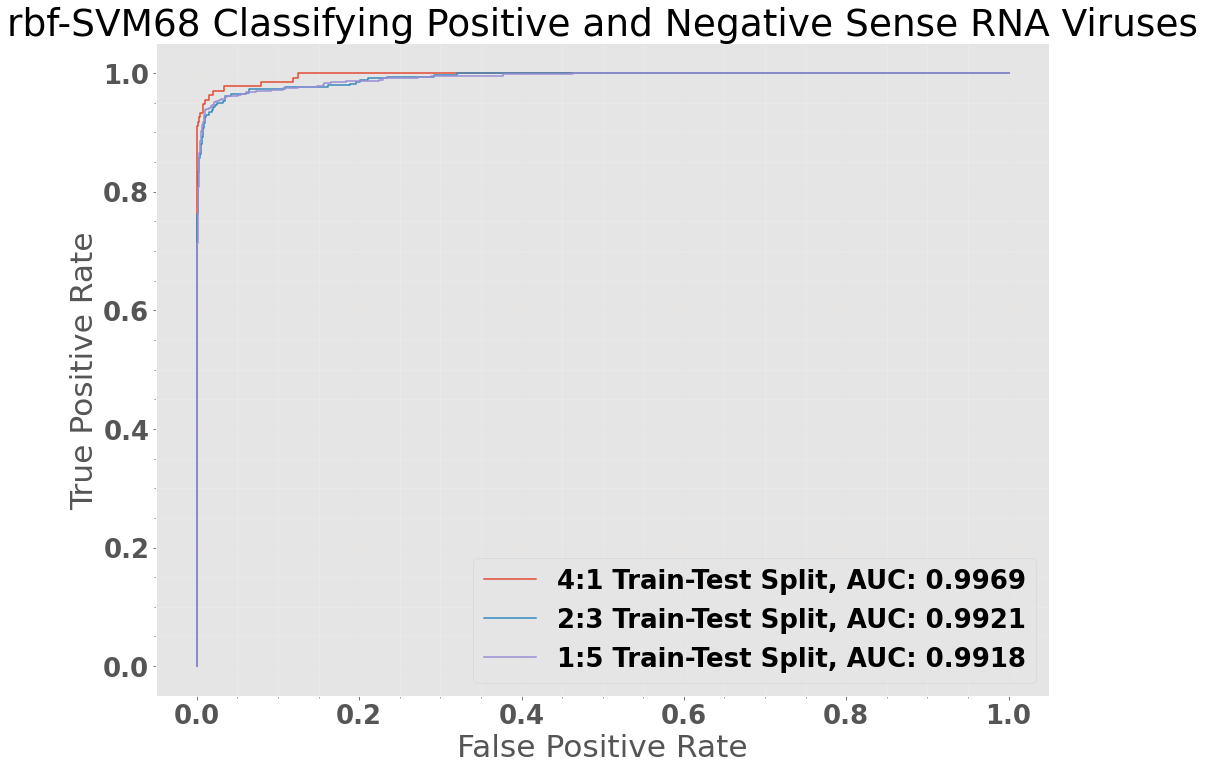

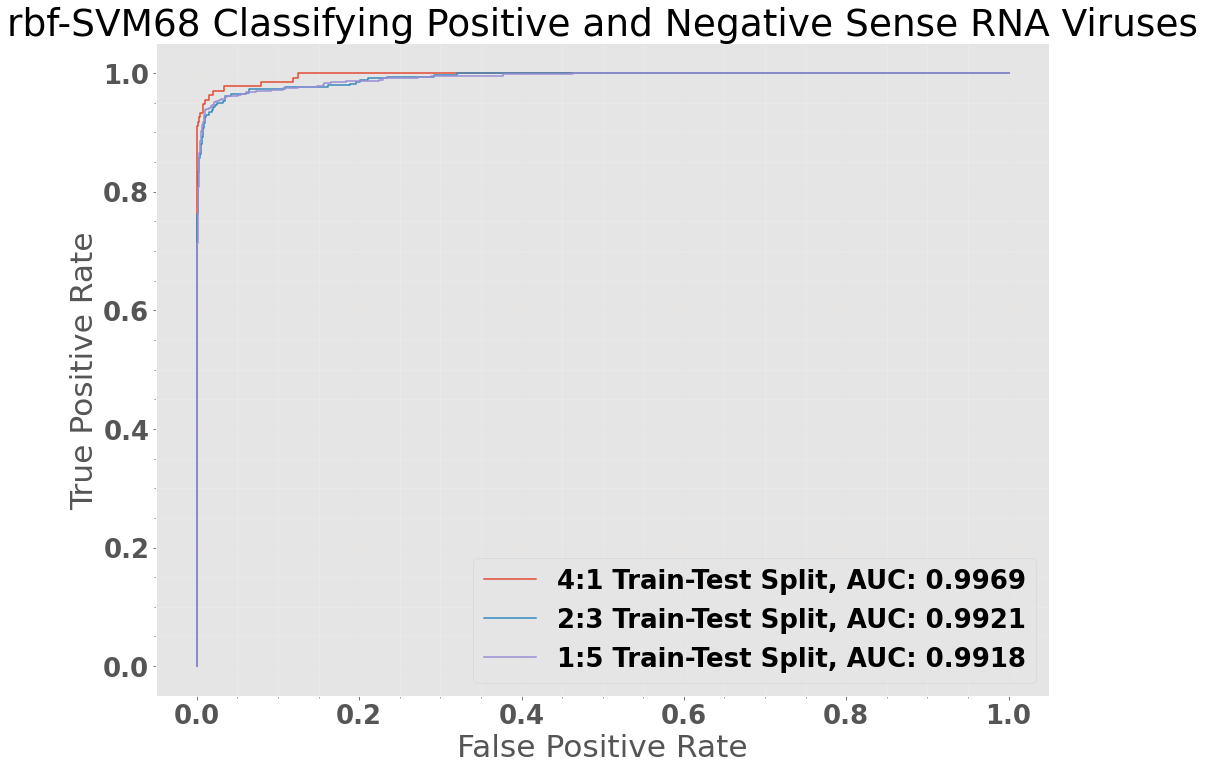

In [ ]:
l =    ['TCAATC', 'CCAATT', 'GTTGAC', 'TGAT', 'GGTT', 'GGTTGA', 'GTTGA',
       'TAGCGT', 'CGGTTA', 'TTGACG', 'CGATA', 'CGTCAA', 'CAATCG', 'CGTTGA',
       'GTCGAA', 'GTTG', 'CGGTAA', 'CATACG', 'AAAAAA', 'ACCAAT', 'TCAA',
       'TTGTCG', 'CGATAG', 'AAAAA', 'CAAC', 'ATACGC', 'CAATTG', 'CCAAT',
       'CGCAAT', 'GGTA', 'CAAT', 'TGTCGA', 'CGAT', 'CAATCT', 'GCGTAC', 'GGTTG',
       'TTGA', 'GTTGGT', 'TCCAAT', 'TTGCG', 'ACGGTT', 'CGATTA', 'ATCAAT',
       'GCAATC', 'ATCAAC', 'GTTGAT', 'GTCAAT', 'CGTCGA', 'ATTGG', 'CGTAGT',
       'ATAGCG', 'CCGATA', 'CAATC', 'CATCAA', 'TTCGAC', 'TTGAC', 'TTGCGC',
       'GCGTTA', 'CCGTTA', 'ATACGG', 'CGCGTT', 'CGATC', 'CGATAA', 'ATCGTA',
       'TCGA', 'TCGGTT', 'GATC', 'CGGTT']

c = [f for f in l if len(f) < 6]
b = [f for f in l if len(f) == 6]

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)
df1.loc[df1['Gen'] == 'ssRNA(+)', 'Gen'] = 0
df1.loc[df1['Gen'] == 'ssRNA(+)i', 'Gen'] = 0
df1.loc[df1['Gen'] == 'ssRNA(-)', 'Gen'] = 1
df1.loc[df1['Gen'] == 'ssRNA(-)g', 'Gen'] = 1
data = df1

#Splitting features and labels
X = data.iloc[:, 3:].values.astype(float)
y = data.iloc[:, 0].values.astype(float)
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin1 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac1 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin1 = f1_score(y_test, y_pred, average='binary')
f1mac1 = f1_score(y_test, y_pred, average='macro')

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm1[1,1], cm1[0,1], cm1[0,0], cm1[1,0], cv_bin1.mean(), cv_bin1.std(), cv_mac1.mean(), cv_mac1.std(), f1bin1, f1mac1))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.rc('font', **{'family' : 'sans-serif', 'weight' : 'bold', 'size' : 26})
plt.rcParams['font.sans-serif'] = ['Lucida Grande']
acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin2 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac2 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin2 = f1_score(y_test, y_pred, average='binary')
f1mac2 = f1_score(y_test, y_pred, average='macro')

acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm2[1,1], cm2[0,1], cm2[0,0], cm2[1,0], cv_bin2.mean(), cv_bin2.std(), cv_mac2.mean(), cv_mac2.std(), f1bin2, f1mac2))


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
### Training the decision tree model on the Training set
classifier = SVC(kernel = 'rbf', probability = True)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred)
#evaluation
cv_bin3 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
cv_mac3 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
f1bin3 = f1_score(y_test, y_pred, average='binary')
f1mac3 = f1_score(y_test, y_pred, average='macro')

acc = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)

print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
      % (cm3[1,1], cm3[0,1], cm3[0,0], cm3[1,0], cv_bin3.mean(), cv_bin3.std(), cv_mac3.mean(), cv_mac3.std(), f1bin3, f1mac3))


plt.title("rbf-SVM68 Classifying Positive and Negative Sense RNA Viruses")
plt.legend(['4:1 Train-Test Split, AUC: %.4f' % auc1, 
            '2:3 Train-Test Split, AUC: %.4f' %auc2,
            '1:5 Train-Test Split, AUC: %.4f' %auc3])
#major grid lines
plt.grid(b=True, which='major', color='moccasin', alpha=0.1, linestyle='dashdot', lw=1.5)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='azure', alpha=0.2, ls='-', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('PNClass3.png', xlabel = "False Positive Rate", ylabel = "True Positive Rate")
plt.show()
